In [1]:
!pip3 install seaborn==0.9.0

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.arima_model  

%matplotlib inline

In [3]:
print(sns.__version__)

0.9.0


In [4]:
javascript_df = pd.read_excel('month_trend.xlsx', sheetname='javascript')
java_df = pd.read_excel('month_trend.xlsx', sheetname='java')
python_df = pd.read_excel('month_trend.xlsx', sheetname='python')
html_df = pd.read_excel('month_trend.xlsx', sheetname='html')
ruby_df = pd.read_excel('month_trend.xlsx', sheetname='ruby')
c_df = pd.read_excel('month_trend.xlsx', sheetname='c')
c_plus_plus_df = pd.read_excel('month_trend.xlsx', sheetname='c++')
php_df = pd.read_excel('month_trend.xlsx', sheetname='php')

c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [5]:
javascript_df.head()

,year,month,count
0,2015,1,151940
1,2015,2,146883
2,2015,3,165427
3,2015,4,164327
4,2015,5,164172


In [6]:
javascript_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
year     52 non-null int64
month    52 non-null int64
count    52 non-null int64
dtypes: int64(3)
memory usage: 1.3 KB


In [7]:
#total_df['date']=total_df['year'].map(str) + '-' + total_df['month'].map(str)

In [8]:
javascript_df['language']='javascript'
java_df['language']='java'
python_df['language']='python'
html_df['language']='html'
ruby_df['language']='ruby'
c_df['language']='c'
c_plus_plus_df['language']='c++'
php_df['language']='php'

In [9]:
total_df = pd.concat([javascript_df,java_df,python_df,html_df,ruby_df,c_df,c_plus_plus_df,php_df],axis=0,ignore_index=True)

In [10]:
total_df['date']=total_df['year'].map(str) + '-' + total_df['month'].map(str)

In [11]:
len(total_df)

416

In [12]:
total_df = total_df.drop(['year','month'],axis=1)

In [13]:
total_df.head()

,count,language,date
0,151940,javascript,2015-1
1,146883,javascript,2015-2
2,165427,javascript,2015-3
3,164327,javascript,2015-4
4,164172,javascript,2015-5


In [14]:
javascript_df = total_df[total_df['language']=='javascript']
java_df = total_df[total_df['language']=='java']
python_df = total_df[total_df['language']=='python']
html_df = total_df[total_df['language']=='html']
ruby_df = total_df[total_df['language']=='ruby']
c_df = total_df[total_df['language']=='c']
c_plus_plus_df = total_df[total_df['language']=='c++']
php_df = total_df[total_df['language']=='php']

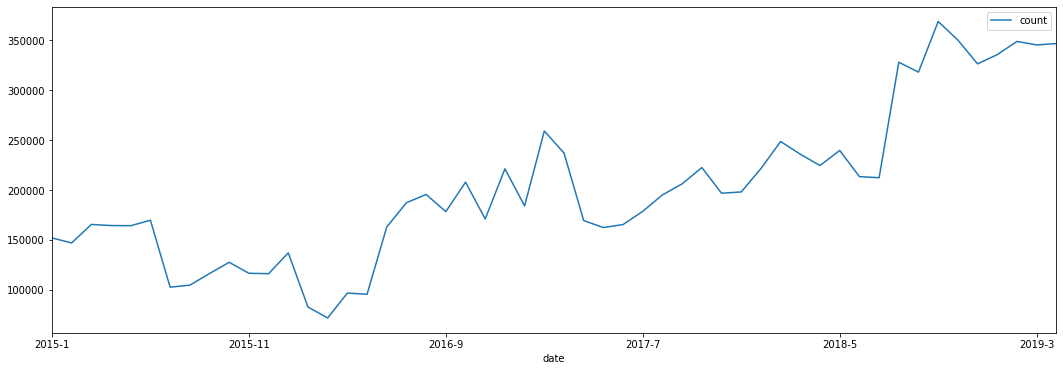

In [15]:
javascript_df.plot(figsize=(18, 6),x='date', y='count')

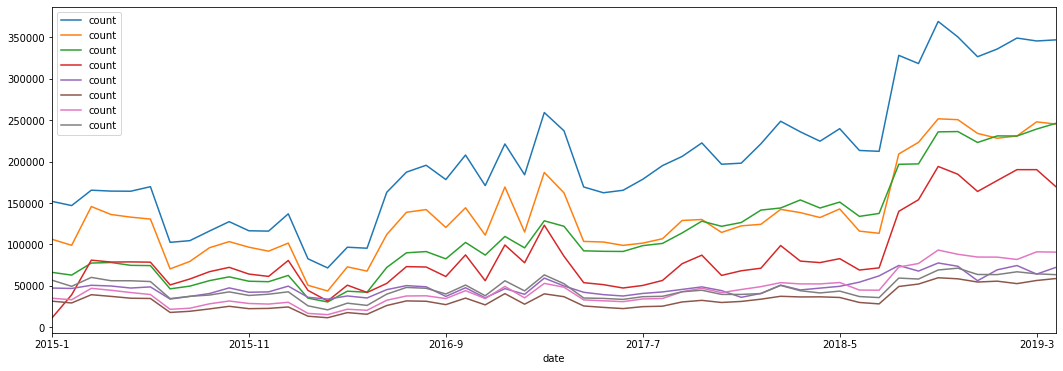

In [16]:
fig, ax = plt.subplots()
plt.legend(('javascript_df','java_df','python_df','html_df','ruby_df','c_df','c_plus_plus_df','php_df'), loc='upper right') 
for df in [javascript_df,java_df,python_df,html_df,ruby_df,c_df,c_plus_plus_df,php_df]:
    df.plot(figsize=(18, 6),x='date', y='count',ax=ax)

In [17]:
javascript_df=javascript_df[['count','date']]

In [18]:
javascript_df.reset_index(inplace=True)
javascript_df['date'] = pd.to_datetime(javascript_df['date'])

In [19]:
javascript_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
index    52 non-null int64
count    52 non-null int64
date     52 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.3 KB


In [20]:
javascript_df = javascript_df.set_index('date')

In [21]:
javascript_df.head()

,index,count
date,,
2015-01-01,0,151940
2015-02-01,1,146883
2015-03-01,2,165427
2015-04-01,3,164327
2015-05-01,4,164172


In [22]:
javascript_df.rename(columns={'count':'respo_amount'}, inplace=True)
len(javascript_df)

52

In [23]:
javascript_df = javascript_df.drop('index',axis=1)

### Time Series

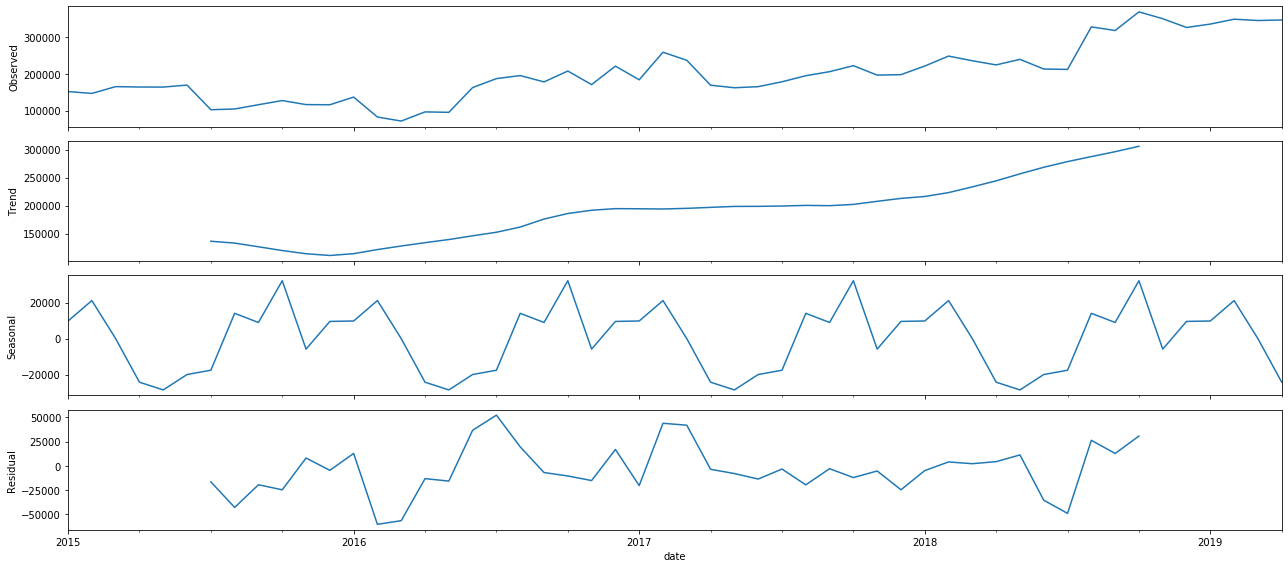

In [24]:
#observed:原始数据 ; Trend:分解出来的趋势部分; Seasonal:周期部分; Residual:残差部分
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(javascript_df, model='additive')
fig = decomposition.plot()
plt.show()

### ARIMA modal

* 使用差分法可以使得数据更平稳，常用的方法就是一阶差分法和二阶差分法。

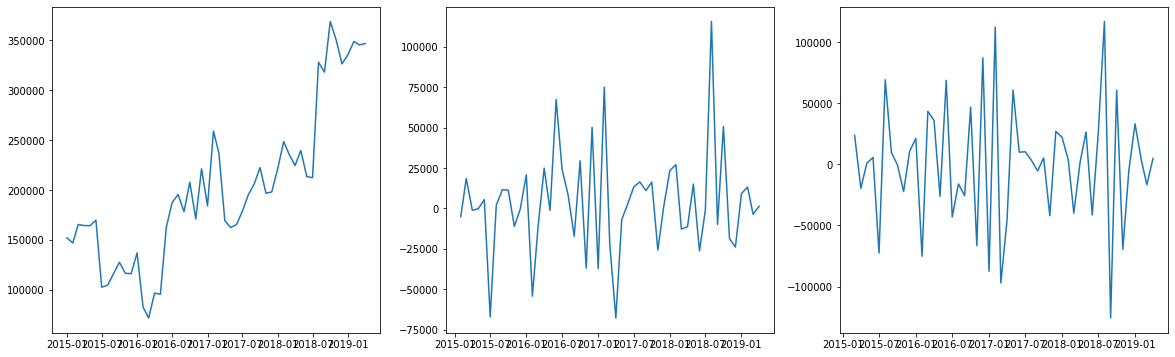

In [25]:
javascript_df['respo_amount_diff_1']=javascript_df['respo_amount'].diff(1)
javascript_df['respo_amount_diff_2']=javascript_df['respo_amount_diff_1'].diff(1)
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax1.plot(javascript_df['respo_amount'])
ax2 = fig.add_subplot(132)
ax2.plot(javascript_df['respo_amount_diff_1'])
ax3 = fig.add_subplot(133)
ax3.plot(javascript_df['respo_amount_diff_2'])
plt.show()

In [26]:
javascript_df.head()

,respo_amount,respo_amount_diff_1,respo_amount_diff_2
date,,,
2015-01-01,151940,NaN,NaN
2015-02-01,146883,-5057.0,NaN
2015-03-01,165427,18544.0,23601.0
2015-04-01,164327,-1100.0,-19644.0
2015-05-01,164172,-155.0,945.0


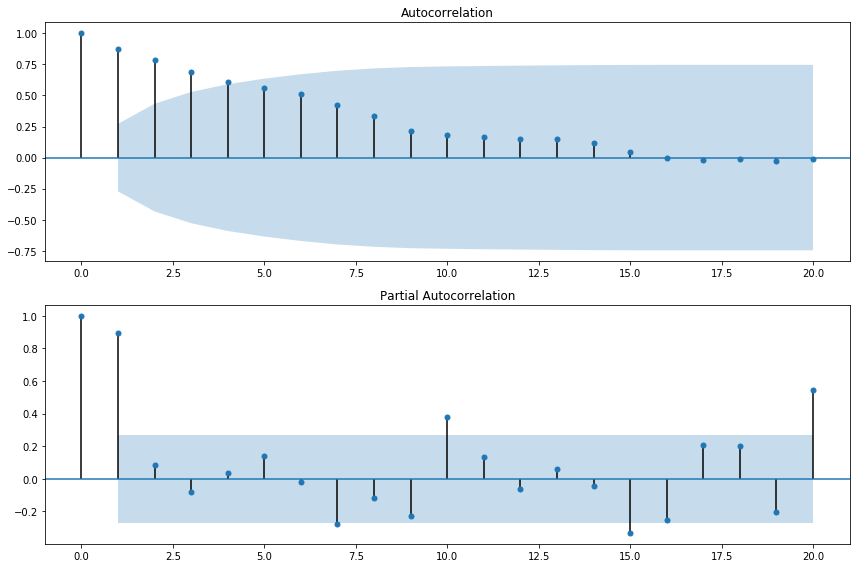

In [27]:
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(javascript_df['respo_amount'], lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(javascript_df['respo_amount'], lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

* 可以看出是自相关系数是4阶拖尾，偏自相关系数2阶截尾

In [28]:
javascript_df_diff1=javascript_df['respo_amount_diff_1'].dropna()

In [29]:
javascript_df_diff2=javascript_df['respo_amount_diff_2'].dropna()

In [53]:
javascript_df_raw = javascript_df['respo_amount'].dropna()

In [30]:
javascript_df_diff2.isnull().count()

50

In [31]:
javascript_df_diff1.head()

date
2015-02-01    -5057.0
2015-03-01    18544.0
2015-04-01    -1100.0
2015-05-01     -155.0
2015-06-01     5469.0
Name: respo_amount_diff_1, dtype: float64

* aic:最小化信息量准则
* bic:贝叶斯信息准则

In [107]:
arma_mod412 = sm.tsa.ARMA(javascript_df_raw,(4,1,2)).fit()
print("arma_mod412:",arma_mod412.aic,arma_mod412.bic,arma_mod412.hqic)
arma_mod422 = sm.tsa.ARMA(javascript_df_raw,(4,2,2)).fit()
print("arma_mod422:",arma_mod422.aic,arma_mod422.bic,arma_mod422.hqic)

c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


arma_mod412: 1239.7899745196905 1253.4486805497604 1245.026400047128


c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


arma_mod422: 1241.8739476555409 1257.4838974041922 1247.8584339726121


* forecast javascript_df_diff1

In [108]:
model1 = ARIMA(javascript_df_raw,order=(4,1,2))

c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [109]:
arima_result = model1.fit(disp=False)

c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [110]:
pred_vals = arima_result.predict(start=pd.to_datetime('2018-01-01'), dynamic=False)

In [111]:
stock_forcast = pd.concat([javascript_df_diff1,pred_vals],axis=1,keys=['original', 'predicted'])

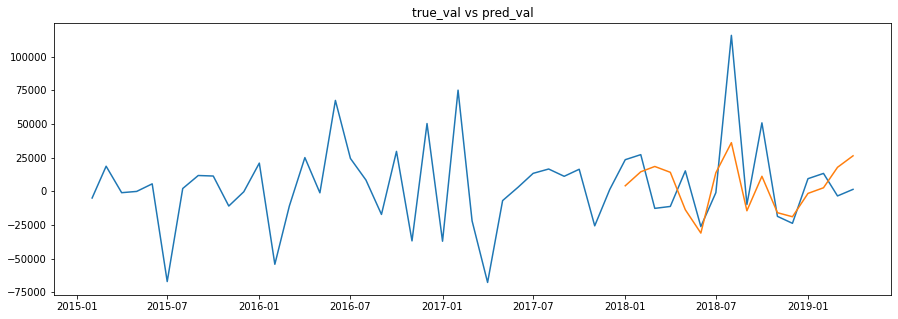

In [112]:
plt.figure(figsize=(15,5)) 
plt.plot(stock_forcast)
plt.title('true_val vs pred_val')
plt.show()

* forecast javascript_df_diff2

In [113]:
model2 = ARIMA(javascript_df_raw,order=(4,2,2))
arima_result2 = model2.fit(disp=-1)

c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [114]:
pred2_vals = arima_result2.predict(start=pd.to_datetime('2018-01-01'),dynamic=False)
stock_forcast2 = pd.concat([javascript_df_diff2,pred2_vals],axis=1,keys=['original', 'predicted'])

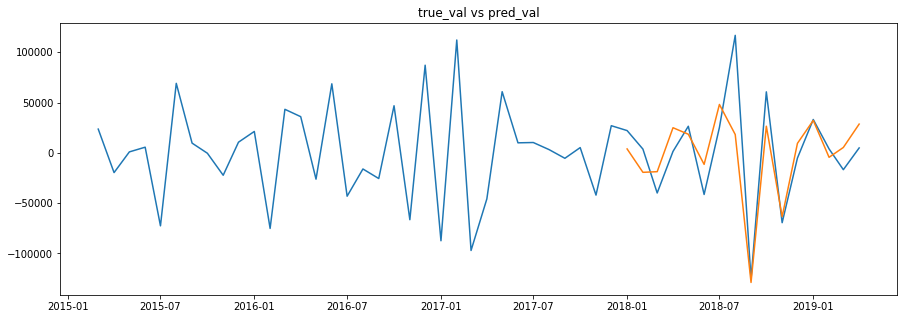

In [115]:
plt.figure(figsize=(15,5)) 
plt.plot(stock_forcast2)
plt.title('true_val vs pred_val')
plt.show()